# Pareto Frontier from ML Models
This Jupyter Notebook file will plot the Pareto Frontier of the Machine Learning Models developed by each team member. We will use False Positive Rate as our objective on the y-axis, and False Negative Rate as our objective on the x axis, so we will want to minimize the AUC.  Objective values for plotting are copied directly from each other individuals notebook. 

## Number of Iterations for everyone to get Co-Dominant
Ankith:

Jenny: 1 (Changed solver to 'newton-cg' And added L2 Regularization)

Ethan: 1 (Changed Kernel to polynomial, overal worse accuracy but much lower False Positive Rate)

Vedu:

Vidit:

In [36]:
import numpy as np
import matplotlib.pylab as plt


Below is the code I used to  calculate the objectives. I put this code in each of the machine learning files and then just copied over the objective values.
```python

confusion_matrix = confusion_matrix(y_test,MLP_cls.predict(X_test))
print(confusion_matrix)
FNR = confusion_matrix[1][0] / (confusion_matrix[1][0] + confusion_matrix[1][1])
FPR = confusion_matrix[0][1] / (confusion_matrix[0][0] + confusion_matrix[0][1])
print(FNR,FPR)
```

In [37]:
ankith_MLP = (0.3173076923076923,0.06282722513089005,"MLPClassifier")#
jenny_log = (0.28846153846153844,0.13612565445026178,"LogisticRegression")#
ethan_SVM = (0.875,0.010471204188481676,"SupportVectorMachines")#
vedu_random = (0.30769230769,0.12565445026,"RandomForest")#
vidit_k_nearest= (0.28846153846153844,0.13089005235602094,"KNearestNeighbors")
ml_models = (ankith_MLP,jenny_log,ethan_SVM,vedu_random,vidit_k_nearest)


In [38]:
#ind1 and ind2 are each tuples of objectives that we wish to minimize. This function returns 1 if dominant, 0 if co-dominant, -1 if dominated.
def paretoDominance(ind1,ind2):
    if ((ind1[0] < ind2[0]) and (ind1[1] < ind2[1])):
        return 1
    if ((ind2[0] < ind1[0]) and (ind2[1] < ind1[1])):
        return -1
    return 0


In [39]:
pareto_frontier=[]
non_frontier=[]
for model1 in ml_models:
    pareto = True
    for model2 in ml_models:
        if (paretoDominance(model1,model2) == -1):
            pareto = False
    if pareto:
        pareto_frontier.append(model1)
    else:
        non_frontier.append(model1)

print(pareto_frontier)
print(non_frontier)

[(0.3173076923076923, 0.06282722513089005, 'MLPClassifier'), (0.28846153846153844, 0.13612565445026178, 'LogisticRegression'), (0.875, 0.010471204188481676, 'SupportVectorMachines'), (0.30769230769, 0.12565445026, 'RandomForest'), (0.28846153846153844, 0.13089005235602094, 'KNearestNeighbors')]
[]


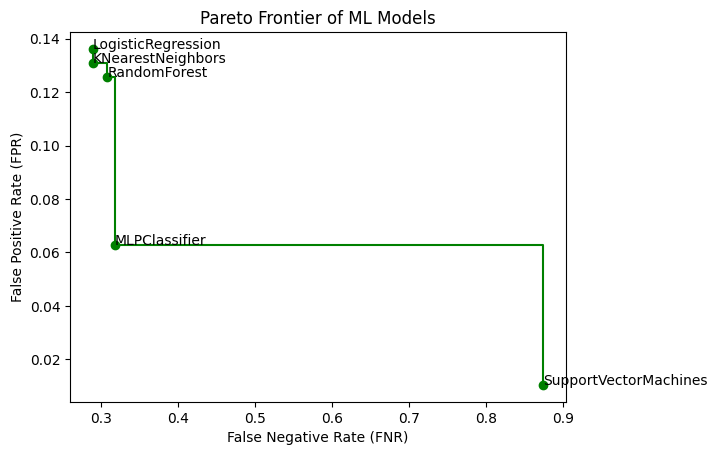

Area Under Curve: 0.0387635924284847


In [40]:
pareto_frontier.sort(key=lambda x: x[0])
pareto_frontier_x = [model[0] for model in pareto_frontier]
pareto_frontier_y = [model[1] for model in pareto_frontier]
non_frontier_x = [model[0] for model in non_frontier]
non_frontier_y = [model[1] for model in non_frontier]

plt.scatter(non_frontier_x,non_frontier_y,color="r")
plt.scatter(pareto_frontier_x,pareto_frontier_y,color="g")
plt.plot(pareto_frontier_x,pareto_frontier_y, color="g",drawstyle='steps-post') #Doesn't draw Steps post when I set drawstyle to 'steps-post'?
plt.xlabel("False Negative Rate (FNR)")
plt.ylabel("False Positive Rate (FPR)")
plt.title("Pareto Frontier of ML Models")
#Adds Labels to each model
for model in ml_models:
    plt.text(model[0],model[1],model[2])
plt.show()

f1 = np.array(pareto_frontier_x)
f2 = np.array(pareto_frontier_y)

"""Calculate area under curve with least squares method"""
print("Area Under Curve: %s" % (np.sum(np.abs(np.diff(f1))*f2[:-1])))